In [1]:
# Add official website of pytorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import torchvision.models as models
import numpy as np

import torch.nn.functional as F  # useful stateless functions

USE_GPU = True
num_class = 100
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

def check_accuracy_part34(loader, model):
    
    print('Checking accuracy on validation set')
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        
    return acc

def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    tr = []
    va = []
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                cs = check_accuracy_part34(loader_val, model)
                print()
            
            tr.append(loss.item())
            va.append(cs)
    return tr, va

using device: cuda


In [2]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms, models 

from torch.utils.data import random_split

batch_size = 64
dataroot = "C:/Users/HinanawiTS/Documents/GitHub/ECE228-project/animals"
dataset = ImageFolder(root = dataroot, transform = transforms.Compose([transforms.ToTensor()]))
train_ratio = 0.7
trainlen = int(len(dataset)*train_ratio)
vallen = len(dataset)-trainlen
train, val = random_split(dataset, [trainlen, vallen])
loader_train = DataLoader(train, batch_size = batch_size, num_workers = 0, pin_memory = True)
loader_val = DataLoader(val, batch_size = batch_size, num_workers = 0, pin_memory = True)

dataset = ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = DataLoader(dataset, batch_size = batch_size, num_workers = 0)
train_ratio = 0.7

trainlen = int(len(dataset) * train_ratio)
vallen = len(dataset) - trainlen
loader_train, loader_val = random_split(dataset, [trainlen, vallen])
loader_train = DataLoader(loader_train, batch_size = batch_size, num_workers = 0)
loader_val = DataLoader(loader_val, batch_size = batch_size, num_workers = 0)

In [3]:
print(models.resnet50(pretrained = True))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [100]:
resnet50 = models.resnet50(pretrained = True)
optimizer = optim.Adam(resnet50.parameters(), lr = 0.0001)
tr, va = train_part34(resnet50, optimizer, epochs = 10)

Epoch 0, Iteration 0, loss = 14.2878
Checking accuracy on validation set
Got 7 / 1621 correct (0.43)

Epoch 1, Iteration 0, loss = 1.1283
Checking accuracy on validation set
Got 1051 / 1621 correct (64.84)

Epoch 2, Iteration 0, loss = 0.1889
Checking accuracy on validation set
Got 1293 / 1621 correct (79.77)

Epoch 3, Iteration 0, loss = 0.0340
Checking accuracy on validation set
Got 1318 / 1621 correct (81.31)

Epoch 4, Iteration 0, loss = 0.0192
Checking accuracy on validation set
Got 1336 / 1621 correct (82.42)

Epoch 5, Iteration 0, loss = 0.0133
Checking accuracy on validation set
Got 1339 / 1621 correct (82.60)

Epoch 6, Iteration 0, loss = 0.0100
Checking accuracy on validation set
Got 1340 / 1621 correct (82.67)

Epoch 7, Iteration 0, loss = 0.0079
Checking accuracy on validation set
Got 1342 / 1621 correct (82.79)

Epoch 8, Iteration 0, loss = 0.0064
Checking accuracy on validation set
Got 1344 / 1621 correct (82.91)

Epoch 9, Iteration 0, loss = 0.0053
Checking accuracy on v

Text(0, 0.5, 'Training Error')

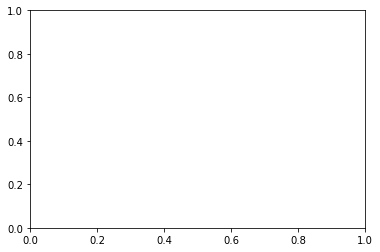

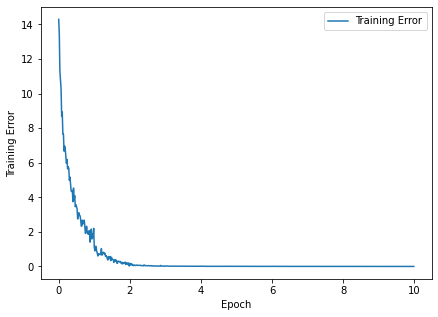

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_dict = dict(x = np.arange(0, 10, 1 / 60), y = tr, z = va)
vi = pd.DataFrame(my_dict)
fig, ax = plt.subplots()

plt.figure(figsize = (7, 5))
sns.lineplot(x = 'x', y = 'y', data = vi, label = "Training Error")

plt.xlabel("Epoch")
plt.ylabel("Training Error")

Text(0, 0.5, 'Validation Accuracy')

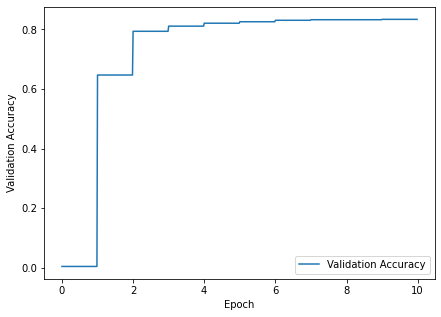

In [12]:
plt.figure(figsize = (7, 5))

sns.lineplot(x = 'x', y = 'z', data = vi, label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")

In [27]:
class Resnetplus(nn.Module):
    def __init__(self):
        super(Resnetplus, self).__init__()
        self.model = models.resnet50(pretrained = True)
        self.model.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 90)
        )
        
    def forward(self, x): 
        batch_size, _, _,_ = x.shape
        x = self.model(x)
        return x

In [28]:
resnetplus = Resnetplus()
optimizer = optim.Adam(resnetplus.parameters(), lr = 0.0001)
tr_improved, va_improved = train_part34(resnetplus, optimizer, epochs = 10)

Epoch 0, Iteration 0, loss = 4.6560
Checking accuracy on validation set
Got 56 / 1621 correct (3.45)

Epoch 1, Iteration 0, loss = 0.5081
Checking accuracy on validation set
Got 1432 / 1621 correct (88.34)

Epoch 2, Iteration 0, loss = 0.1669
Checking accuracy on validation set
Got 1478 / 1621 correct (91.18)

Epoch 3, Iteration 0, loss = 0.0939
Checking accuracy on validation set
Got 1479 / 1621 correct (91.24)

Epoch 4, Iteration 0, loss = 0.0522
Checking accuracy on validation set
Got 1464 / 1621 correct (90.31)

Epoch 5, Iteration 0, loss = 0.0357
Checking accuracy on validation set
Got 1470 / 1621 correct (90.68)

Epoch 6, Iteration 0, loss = 0.0268
Checking accuracy on validation set
Got 1474 / 1621 correct (90.93)

Epoch 7, Iteration 0, loss = 0.0224
Checking accuracy on validation set
Got 1479 / 1621 correct (91.24)

Epoch 8, Iteration 0, loss = 0.0182
Checking accuracy on validation set
Got 1479 / 1621 correct (91.24)

Epoch 9, Iteration 0, loss = 0.0135
Checking accuracy on v

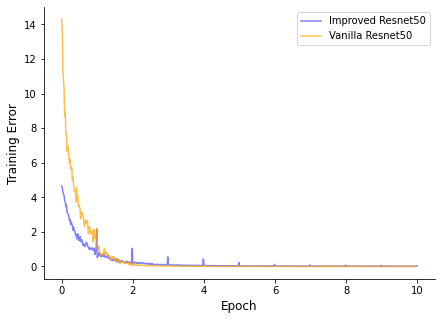

In [101]:
my_dict_v = dict(x = np.arange(0, 10, 1 / 60), y = tr, z = va)
vo = pd.DataFrame(my_dict_v)

my_dict = dict(x = np.arange(0, 10, 1 / 60), y = tr_improved, z = va_improved)
vii = pd.DataFrame(my_dict)

plt.figure(figsize = (7, 5))
te = sns.lineplot(x = 'x', y = 'y', data = vii, label = "Improved Resnet50", color = "blue", alpha = 0.5)
te = sns.lineplot(x = 'x', y = 'y', data = vo, label = "Vanilla Resnet50", color = "orange", alpha = 0.7)

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Training Error", fontsize = 12)

te.spines['top'].set_visible(False)
te.spines['right'].set_visible(False)

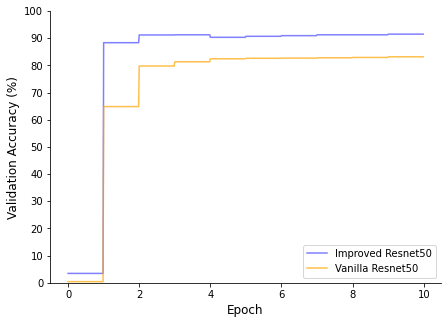

In [102]:
plt.figure(figsize = (7, 5))

vaplt = sns.lineplot(x = 'x', y = 'z', data = vii, label = "Improved Resnet50", color = "blue", alpha = 0.5) 
vaplt = sns.lineplot(x = 'x', y = 'z', data = vo, label = "Vanilla Resnet50", color = "orange", alpha = 0.7)

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.01, 0.1), np.arange(0, 27 + 73 + 1, 10))

plt.xlabel("Epoch", fontsize = 12)
plt.ylabel("Validation Accuracy (%)", fontsize = 12)

vaplt.spines['top'].set_visible(False)
vaplt.spines['right'].set_visible(False)

Image 

In [ ]:
import cv2
from os import listdir
import os

from PIL import Image

def csg(img, dim):
    width, height = img.shape[1], img.shape[0]


    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2) 
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
    return crop_img

i = 0
t = "animals/"
for an in listdir(t):
    th = t + an + "/"
    os.mkdir("processed/" + an)
    for fs in listdir(th): 
    
        i = i + 1
    
        print(th + fs)
    
        gna = cv2.imread(th + fs, cv2.IMREAD_UNCHANGED)
        if (gna.shape[0] > 200) and (gna.shape[1] > 200): 

            img = cv2.imread(th + fs, cv2.IMREAD_UNCHANGED)
            width = 200

            height = 200
            dim = (width, height)
  
            # resize image
            if gna.shape[0] < gna.shape[1]: 
                resiz = csg(img, (gna.shape[0], gna.shape[0]))
            else: 
            
                resiz = csg(img, (gna.shape[1], gna.shape[1]))
    
            resiz = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            print("processed/" + an + "/" + str(i) + ".jpg")
            cv2.imwrite("processed/" + an + "/" + str(i) + ".jpg", resiz)
        


In [ ]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

class ResNetBatch(nn.Module):
    
    def __init__(self, in_channel, num_classes):
        super(ResNetBatch, self).__init__()
        
        self.conv_1 = nn.Conv2d(in_channel, 64, (7, 7), stride = 2, padding = 3)
        nn.init.kaiming_normal_(self.conv_1.weight)
        
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(3, stride = 2, padding = 1)
        
        self.residual_1 = nn.Conv2d(64, 64, kernel_size = 1)
        
        self.bn2_1 = nn.BatchNorm2d(64)
        self.bn2_2 = nn.BatchNorm2d(64)
        
        self.conv_2 = nn.Conv2d(64, 64, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_2.weight)
        
        self.residual_2 = nn.Conv2d(64, 128, kernel_size = 1)
        
        self.conv_3_1 = nn.Conv2d(64, 128, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_3_1.weight)
        
        self.conv_3_2 = nn.Conv2d(128, 128, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_3_2.weight)
        
        self.bn3_1 = nn.BatchNorm2d(128)
        self.bn3_2 = nn.BatchNorm2d(128)
        
        self.residual_3 = nn.Conv2d(128, 256, kernel_size = 1)
        
        self.conv_4_1 = nn.Conv2d(128, 256, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_4_1.weight)
        
        self.conv_4_2 = nn.Conv2d(256, 256, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_4_2.weight)
        
        self.bn4_1 = nn.BatchNorm2d(256)
        self.bn4_2 = nn.BatchNorm2d(256)
        
        self.residual_4 = nn.Conv2d(256, 512, kernel_size = 1, stride = 2)
        
        self.conv_5_1 = nn.Conv2d(256, 512, (3, 3), stride = 2, padding = 1)
        nn.init.kaiming_normal_(self.conv_5_1.weight)
        
        self.conv_5_2 = nn.Conv2d(512, 512, (3, 3), padding = 1)
        nn.init.kaiming_normal_(self.conv_5_2.weight)
        
        self.bn5_1 = nn.BatchNorm2d(512)
        self.bn5_2 = nn.BatchNorm2d(512)
        
        self.avgpool = nn.AvgPool2d(3 + 1)
        self.fs = nn.Linear(25088, num_classes)
        
    def forward(self, x): 
        x = self.relu(self.bn1(self.conv_1(x)))
        x = self.maxpool(x)
        r1 = self.residual_1(x)
        
        x = self.relu(self.bn2_1(self.conv_2(x)))
        x = self.relu(self.bn2_2(self.conv_2(x)))
        r2 = x + r1
        
        x = self.relu(self.bn3_1(self.conv_3_1(r2)))
        x = self.relu(self.bn3_2(self.conv_3_2(x)))
        
        r3 = x + self.residual_2(r2)
        
        x = self.relu(self.bn4_1(self.conv_4_1(x)))
        x = self.relu(self.bn4_2(self.conv_4_2(x)))
        r4 = x + self.residual_3(r3)
        
        x = self.relu(self.bn5_1(self.conv_5_1(x)))
        x = self.relu(self.bn5_2(self.conv_5_2(x)))
        r5 = x + self.residual_4(r4)
        
        x = self.avgpool(r5)
        x = flatten(x)
        x = self.fs(x)
        
        return x
        